In [1]:
!nvidia-smi

Thu Nov 14 05:13:46 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip uninstall ultralytics -y
!pip install ultralytics --no-cache-dir --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 21.6 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.31 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="t4DiHJzpmpEnGCNNSHwd")
project = rf.workspace("college-eac6q").project("dangerous-and-nondangerous")
version = project.version(1)
dataset = version.download("yolov11")           

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dangerous-And-NonDangerous-1 in yolov11:: 100%|██████████| 17138/17138 [00:02<00:00, 6733.99it/s]


In [6]:
dataset.location

'/kaggle/working/Dangerous-And-NonDangerous-1'

In [7]:
!yolo task=detect mode=train model='/content/yolo11m.pt' data={dataset.location}/data.yaml epochs=80 imgsz=640

100%|███████████████████████████████████████| 38.8M/38.8M [00:00<00:00, 127MB/s]
Ultralytics 8.3.31 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11m.pt, data=/kaggle/working/Dangerous-And-NonDangerous-1/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

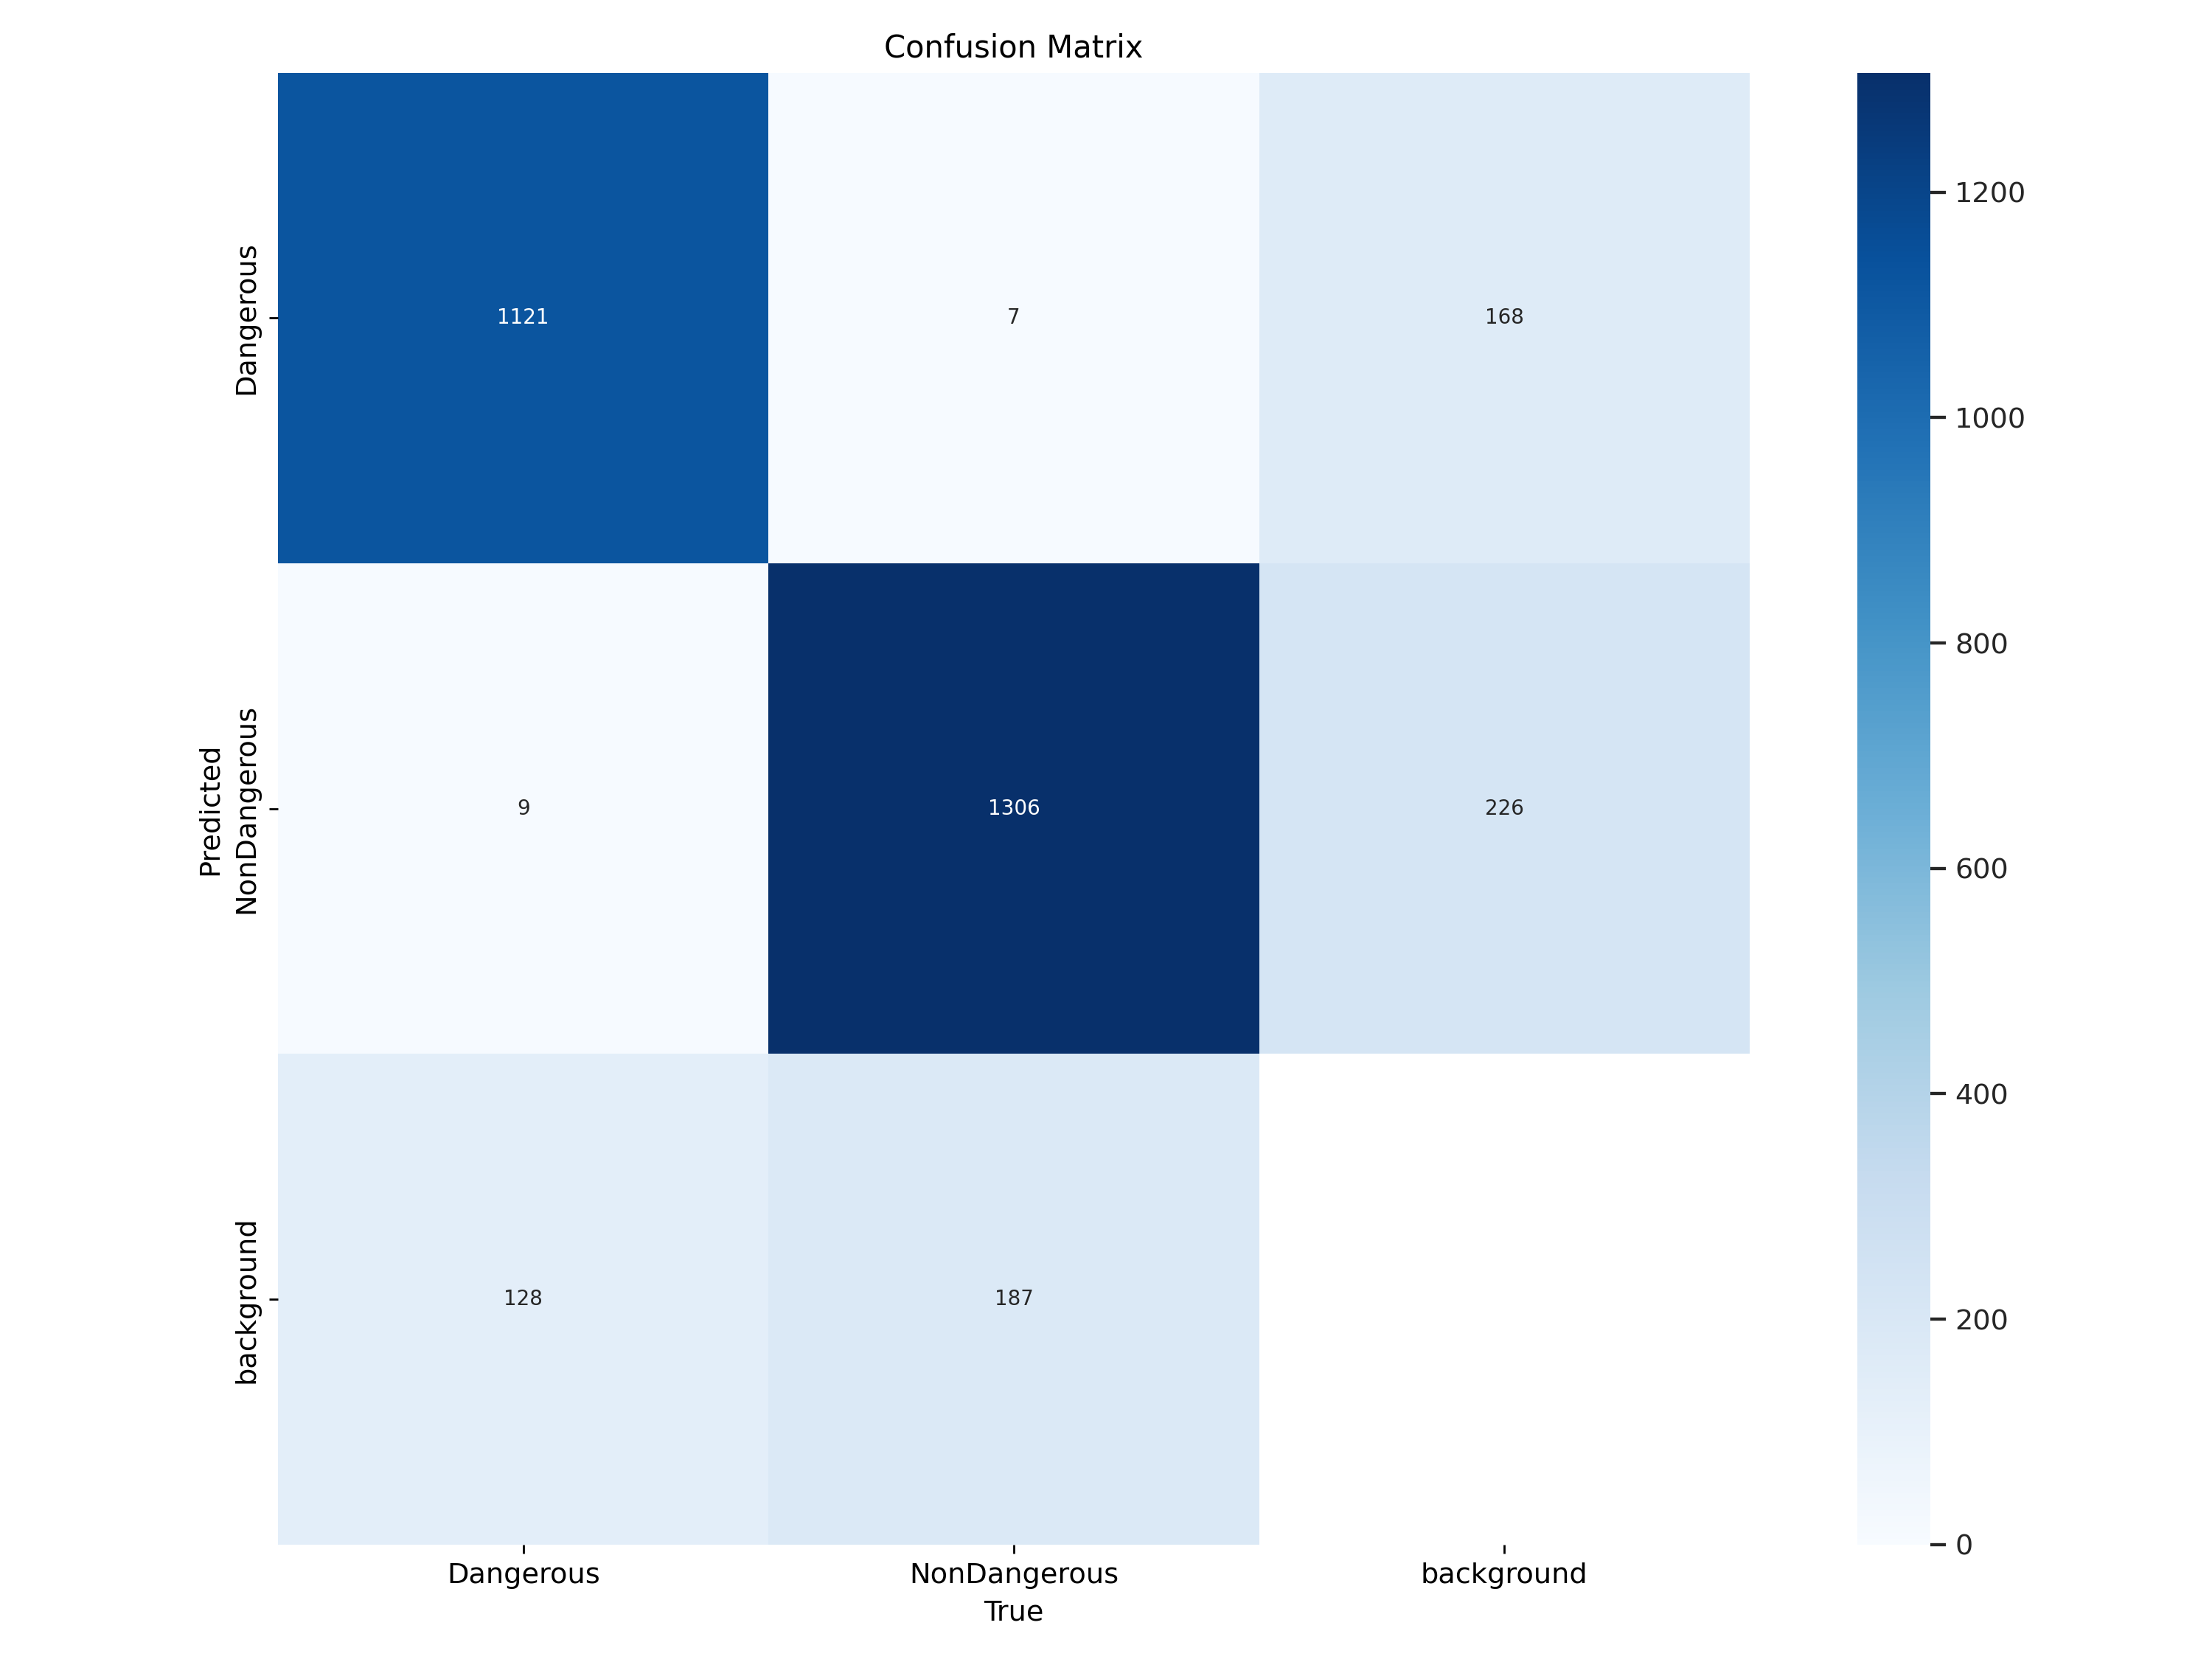

In [8]:
Image('/kaggle/working/runs/detect/train/confusion_matrix.png',width=800)

In [9]:
#dataset https://universe.roboflow.com/son-iktl5/final-f0jjh/dataset/1#

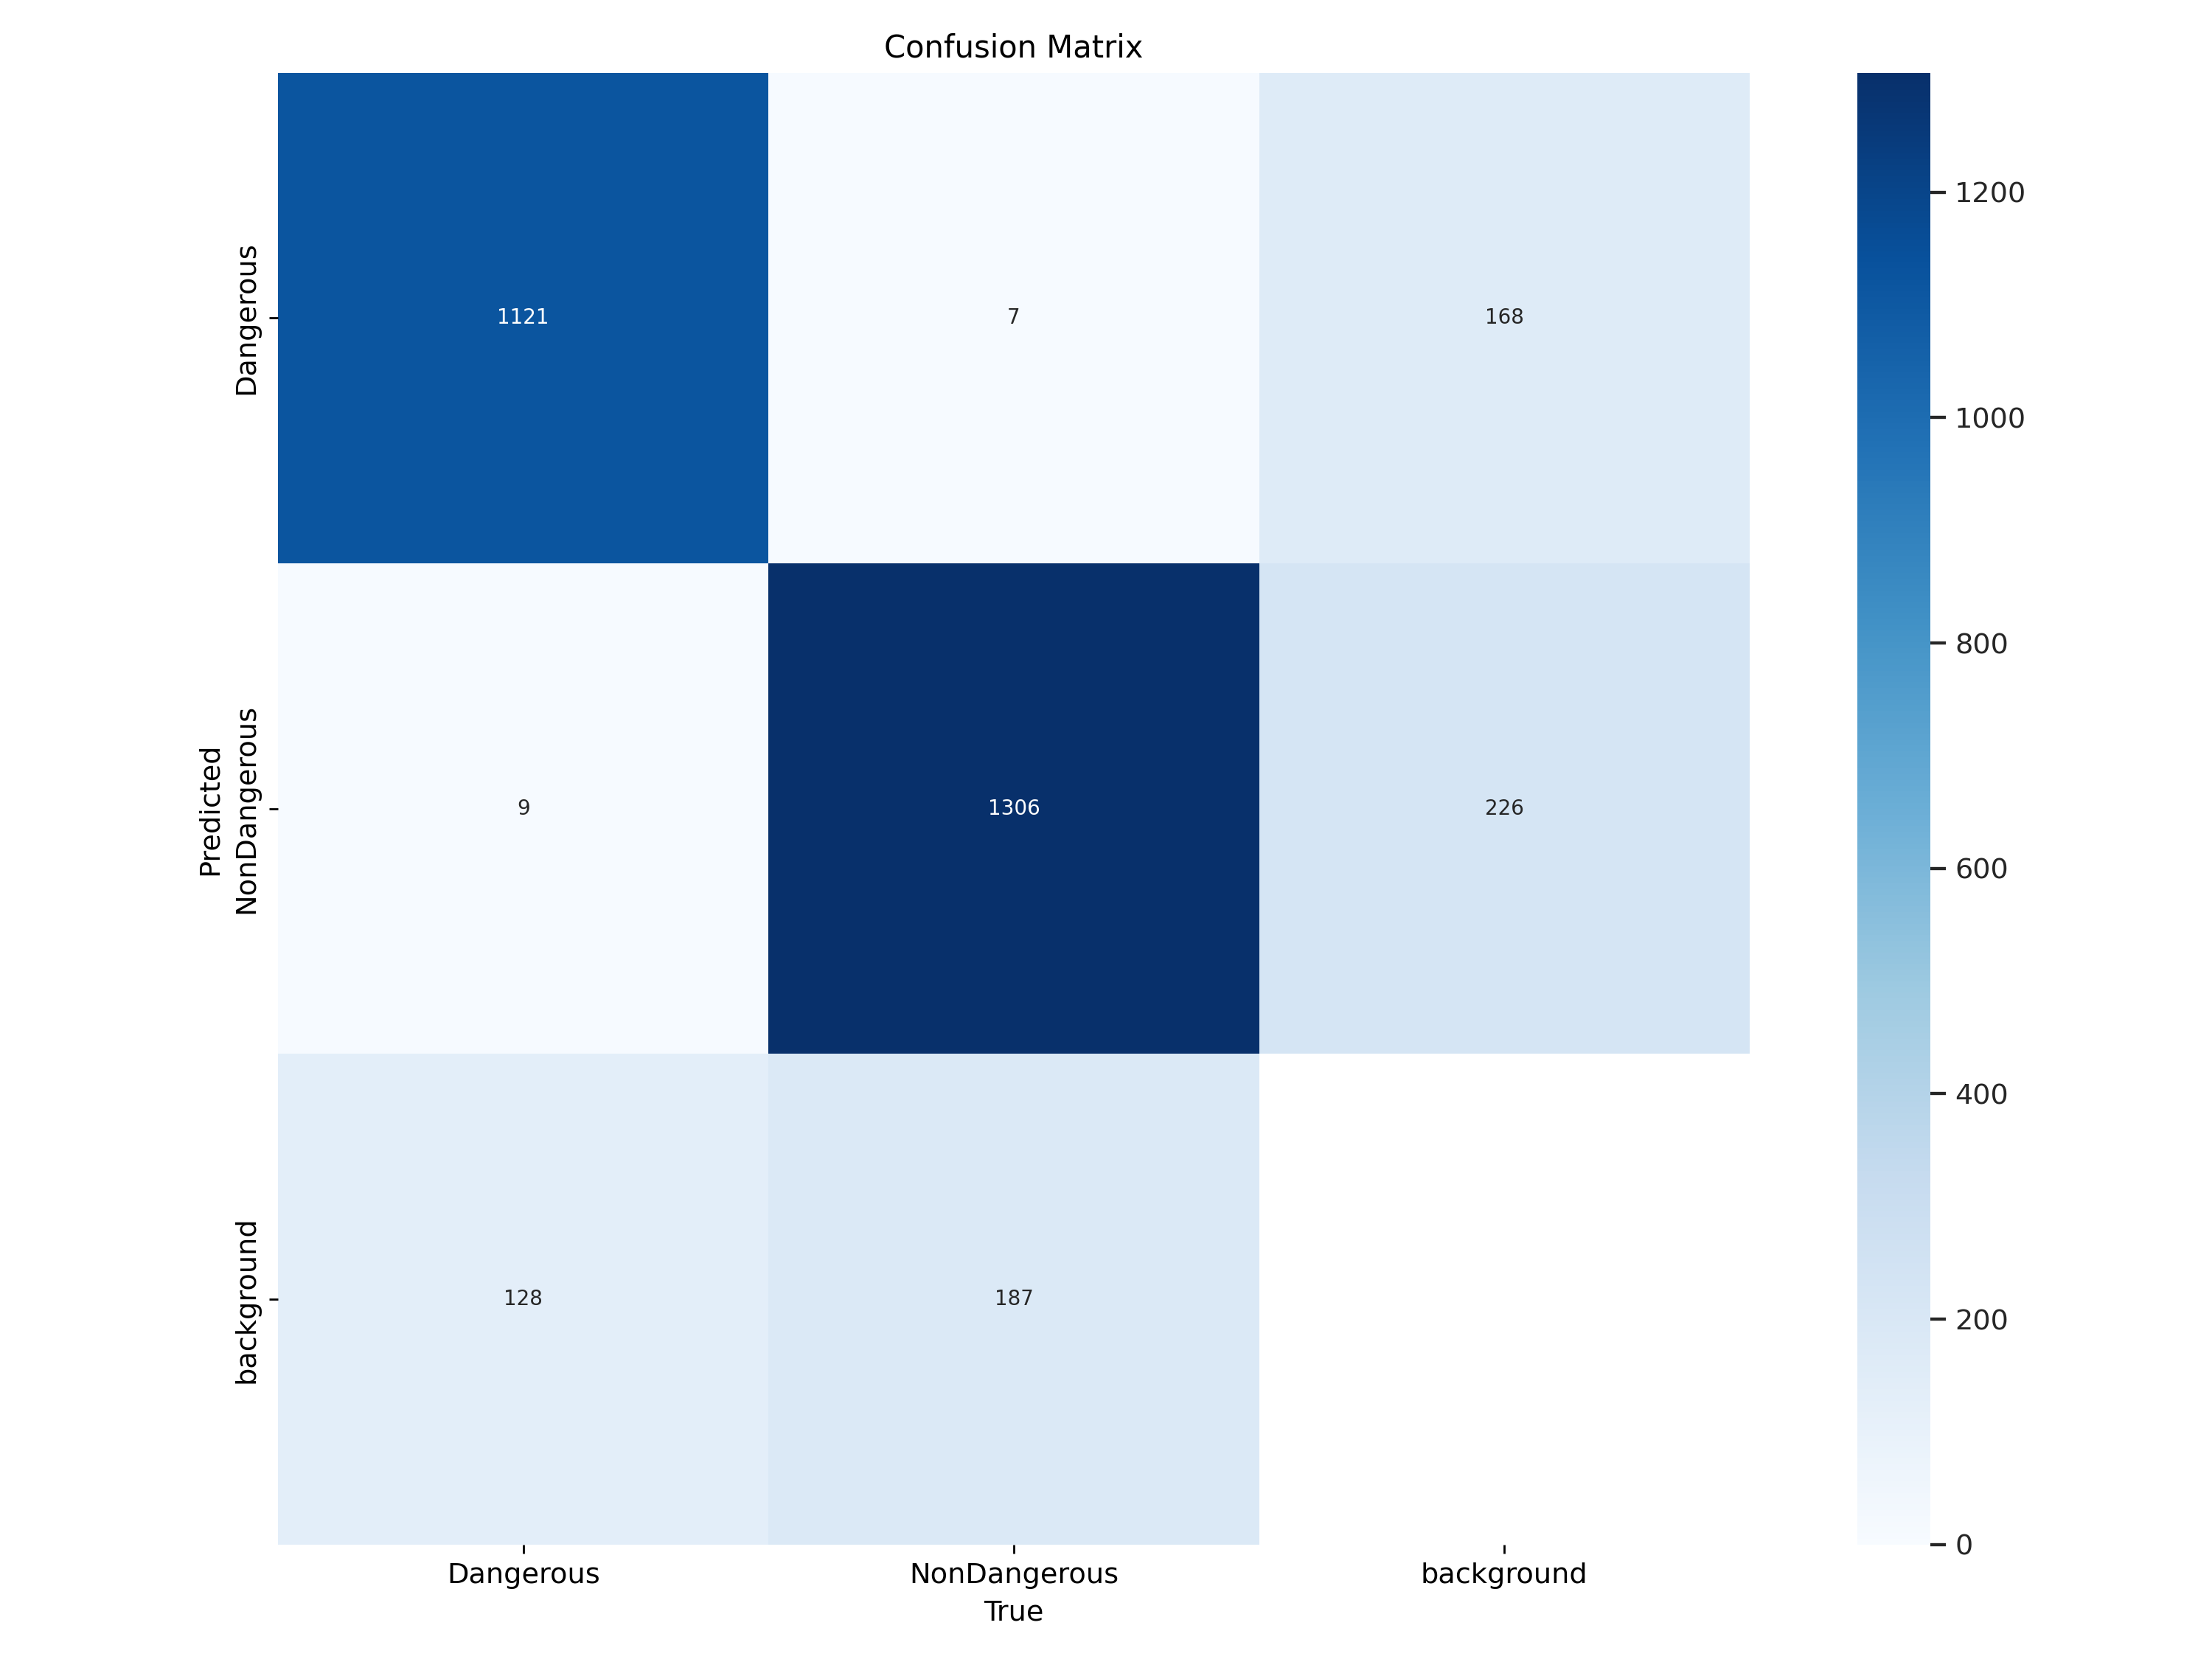

In [10]:
Image('/kaggle/working/runs/detect/train/confusion_matrix.png',width=800)

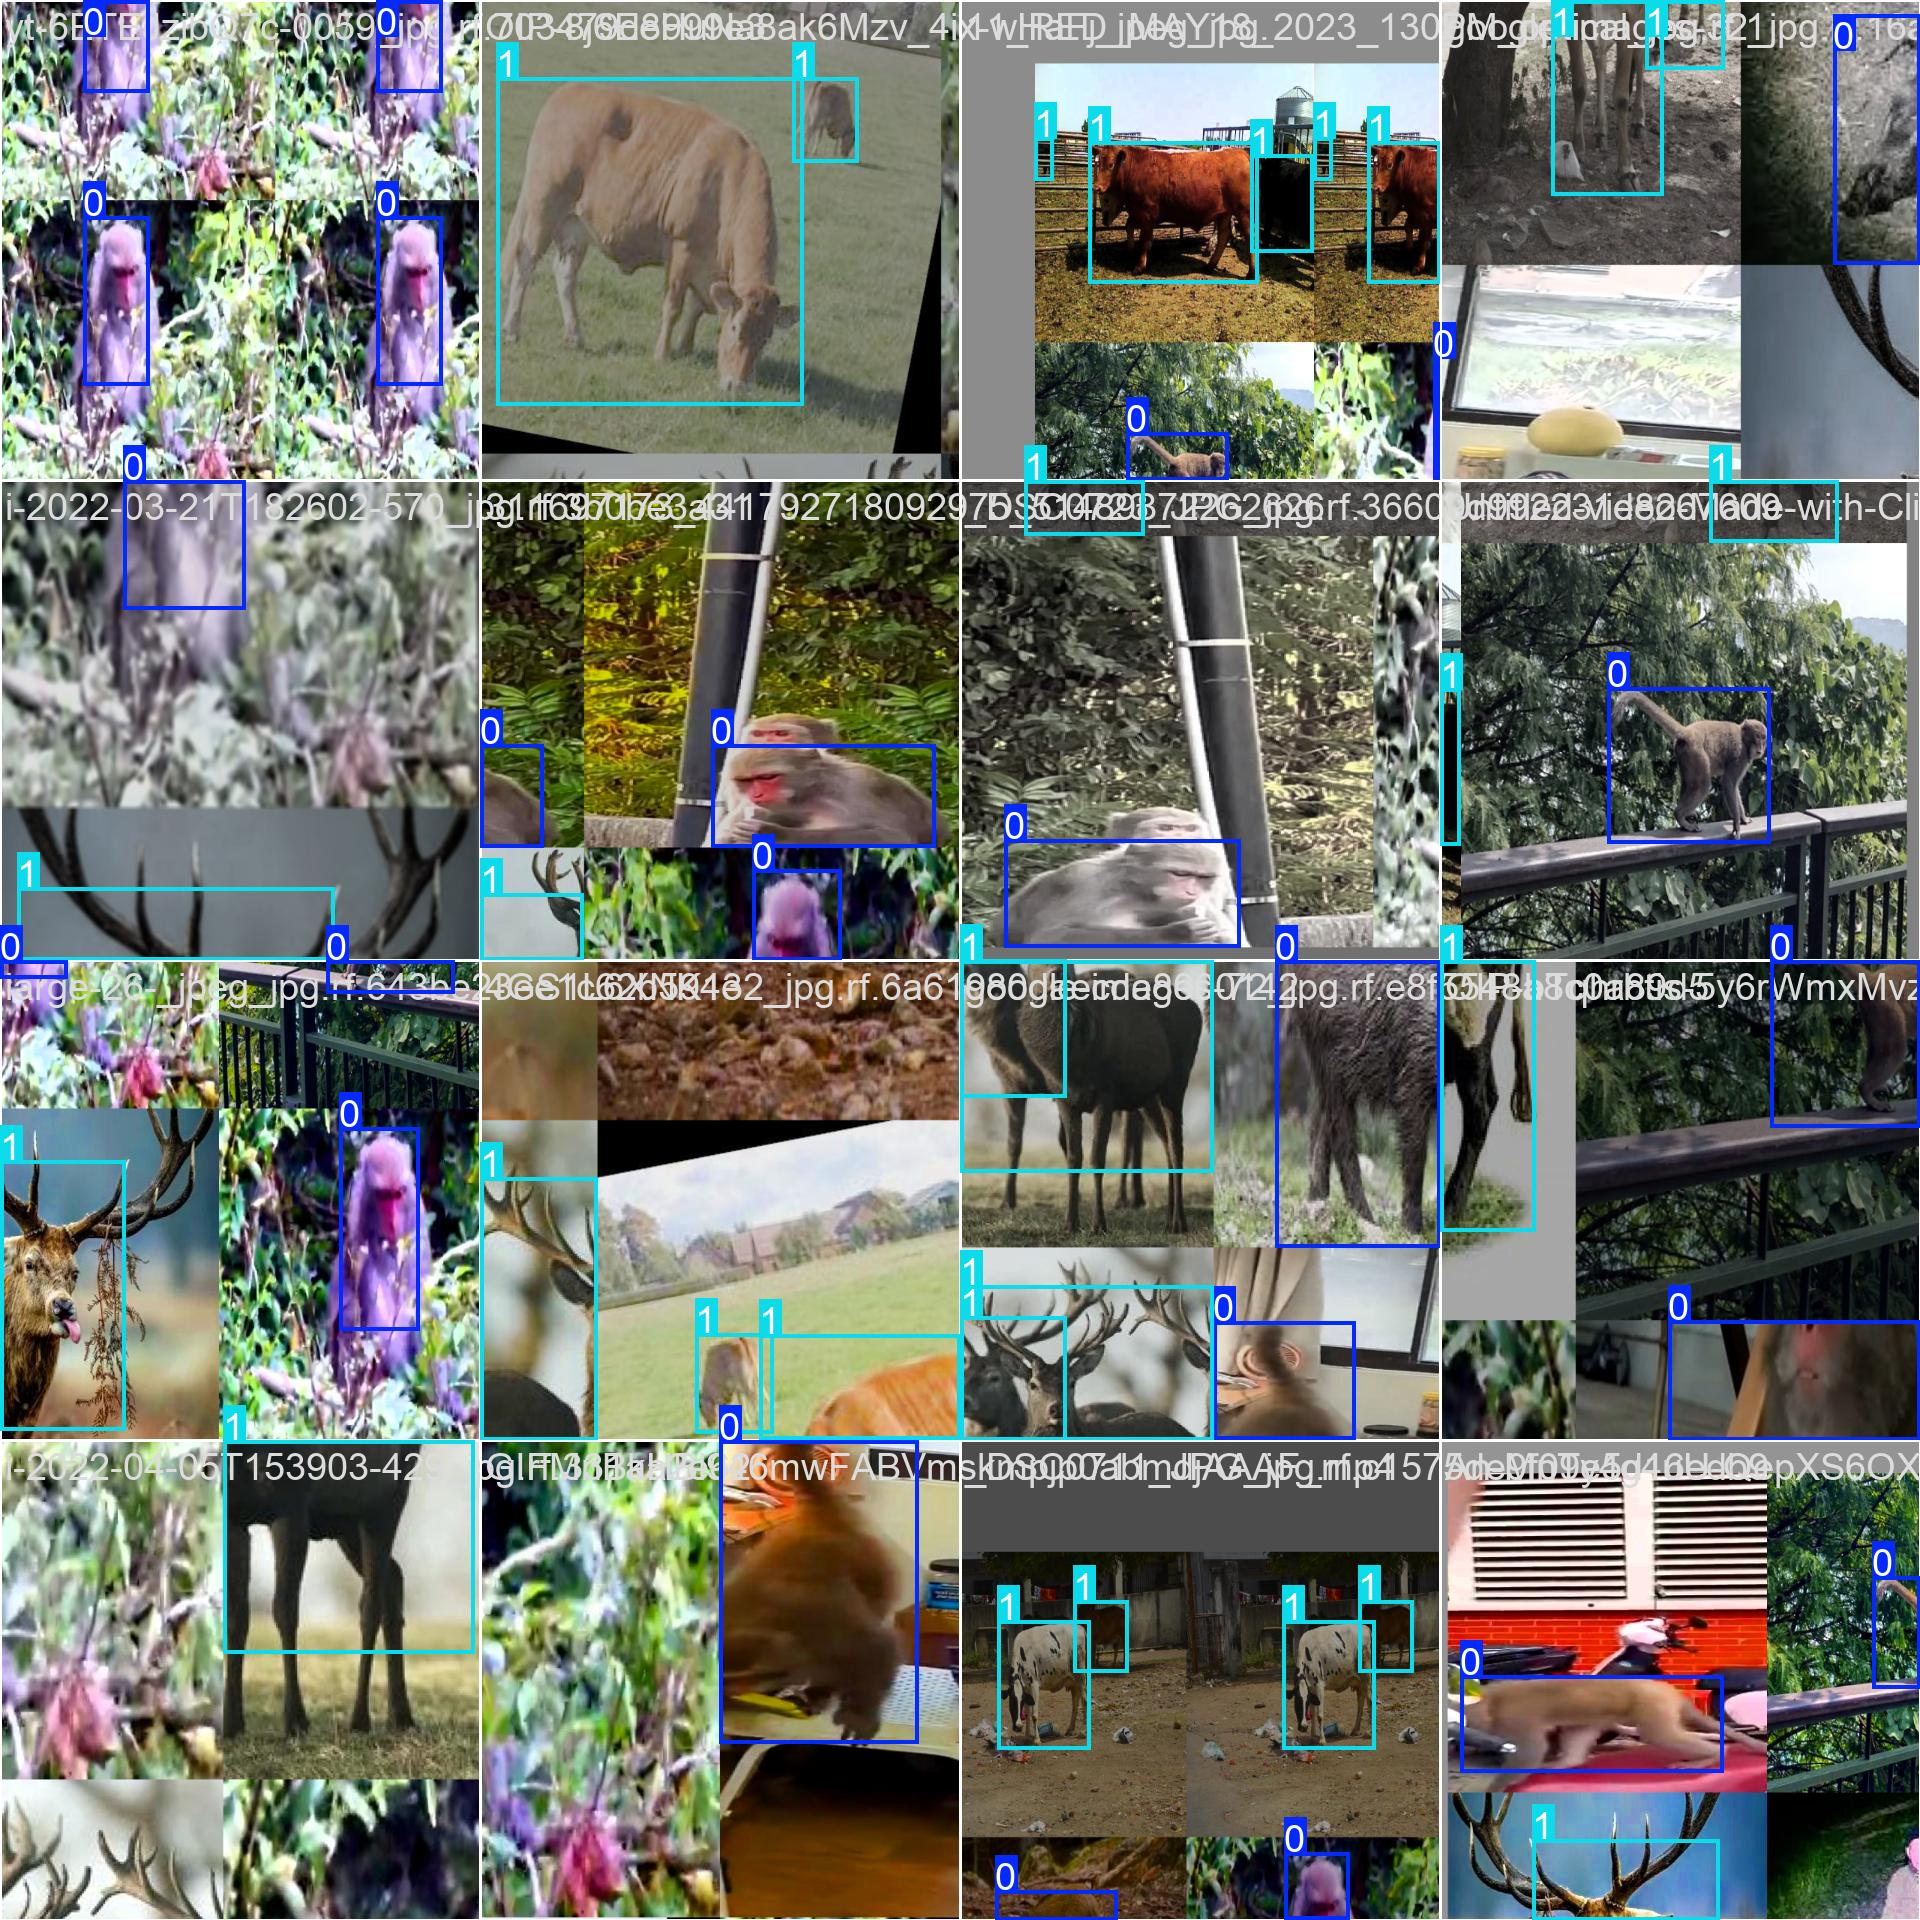

In [11]:
Image('/kaggle/working/runs/detect/train/train_batch0.jpg',width=800)

In [12]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics 8.3.31 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /kaggle/working/Dangerous-And-NonDangerous-1/valid/labels.cache...
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 554, len(boxes) = 2758. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1709       2758      0.918      0.827      0.909      0.681
             Dangerous        812       1258      0.916      0.832      0.917      0.657
          NonDangerous        897       1500       0.92      0.821        0.9      0.706
Speed: 0.3ms preprocess, 23.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https

In [13]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/train/weights/best.pt' conf=.25 data={dataset.location}/test/images save=True source={dataset.location}/test/images

Ultralytics 8.3.31 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs

image 1/853 /kaggle/working/Dangerous-And-NonDangerous-1/test/images/-286_jpg.rf.b8fb04b22a48e9332d414b17c1e3cd5f.jpg: 640x640 1 NonDangerous, 36.8ms
image 2/853 /kaggle/working/Dangerous-And-NonDangerous-1/test/images/-333_jpg.rf.23a625a202a0b9ffa7a304742d495d83.jpg: 640x640 1 Dangerous, 1 NonDangerous, 36.9ms
image 3/853 /kaggle/working/Dangerous-And-NonDangerous-1/test/images/-359_jpg.rf.1cba0fc7c28ce4f4b113339a06474ff2.jpg: 640x640 3 NonDangerouss, 36.8ms
image 4/853 /kaggle/working/Dangerous-And-NonDangerous-1/test/images/-39_jpg.rf.14529ae53e2306aa772bb158f5cbae0c.jpg: 640x640 1 NonDangerous, 36.8ms
image 5/853 /kaggle/working/Dangerous-And-NonDangerous-1/test/images/-4-_jpg.rf.a6ac1776cc2e4525f78da3d0e406e8ad.jpg: 640x640 1 Dangerous, 36.8ms
image 6/853 /kaggle/working/Dangerous-And-NonDangerous-1/test/images/-4_jpg.rf.

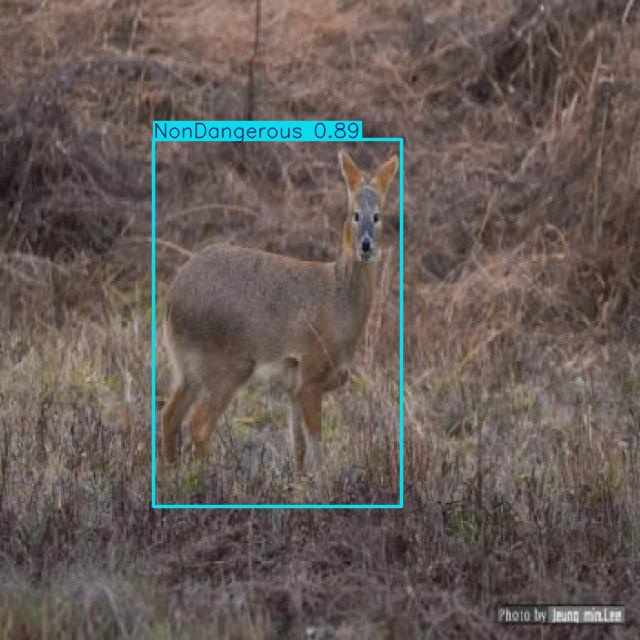

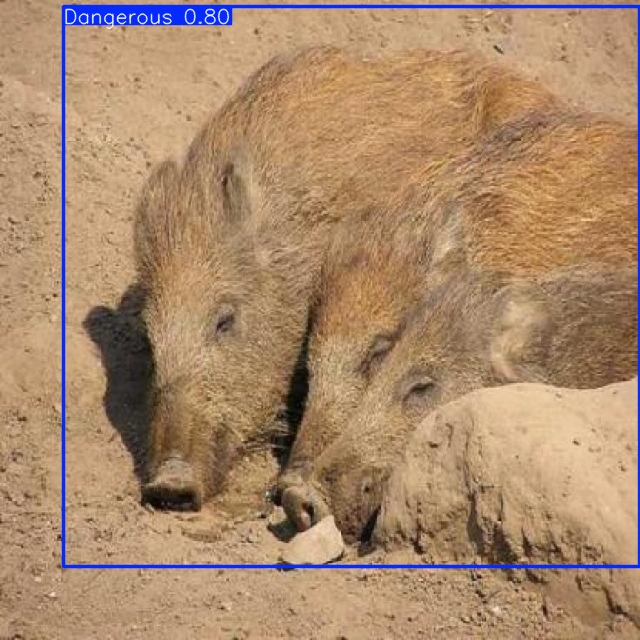

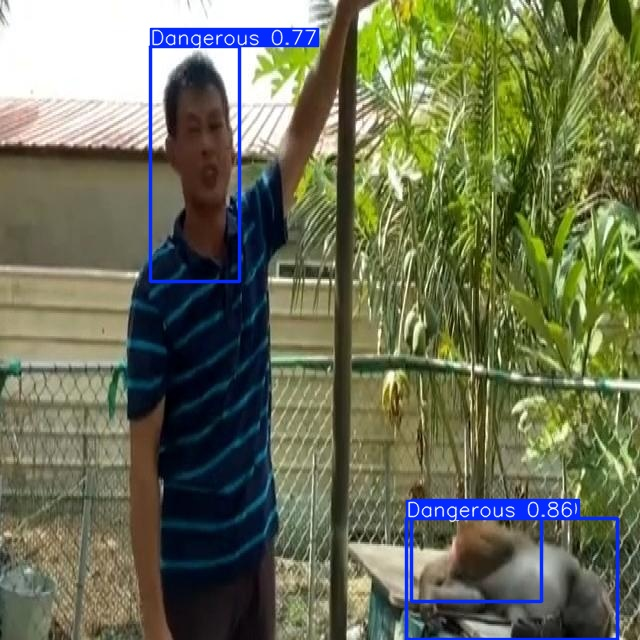

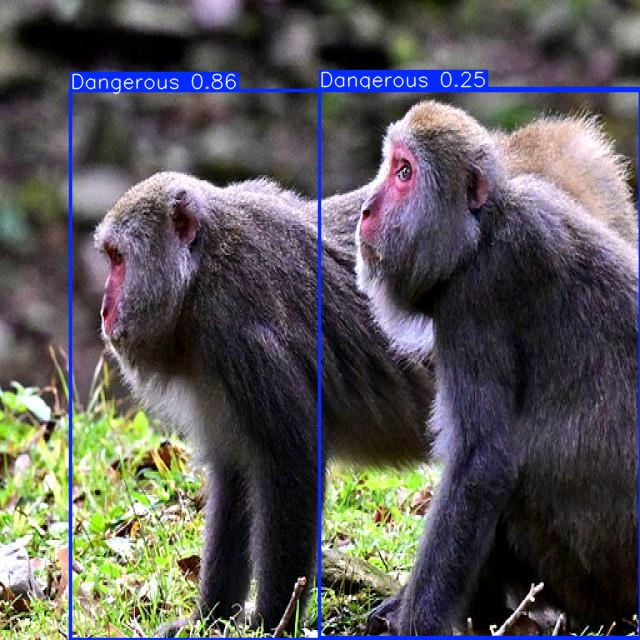

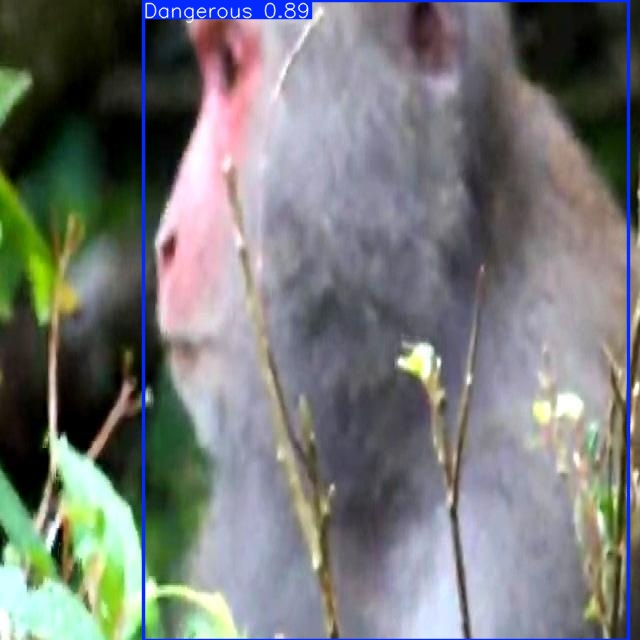

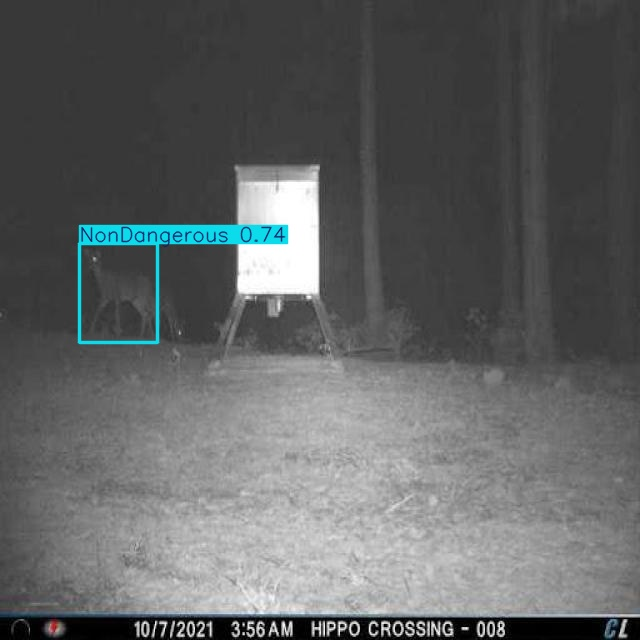

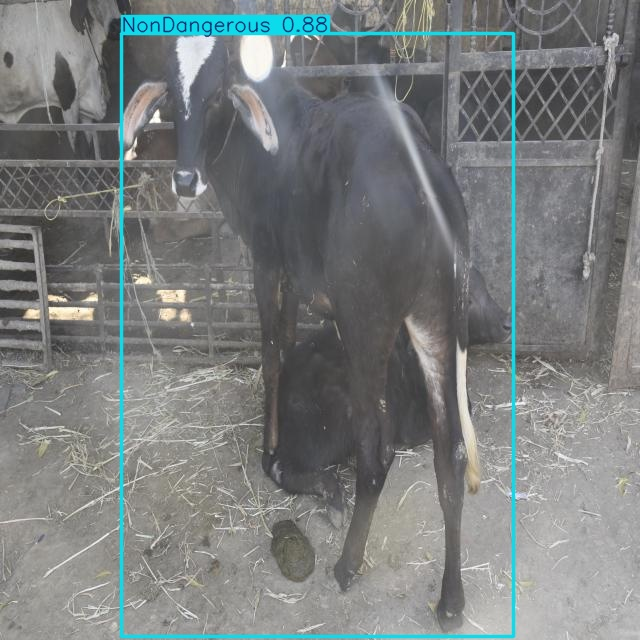

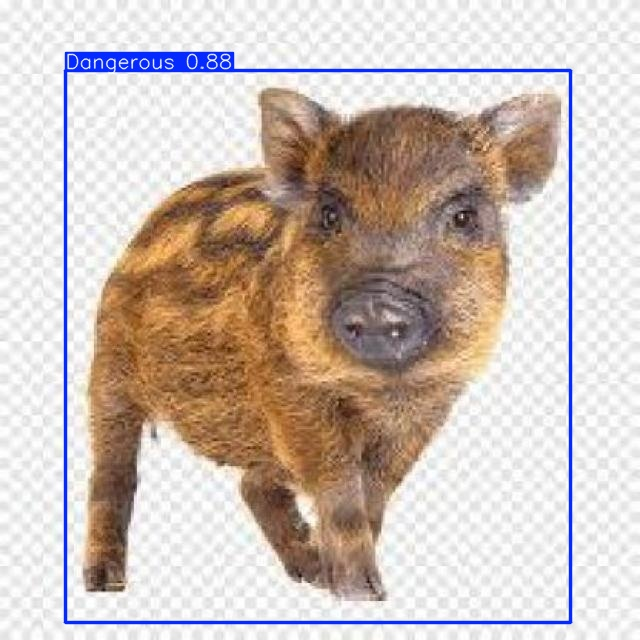

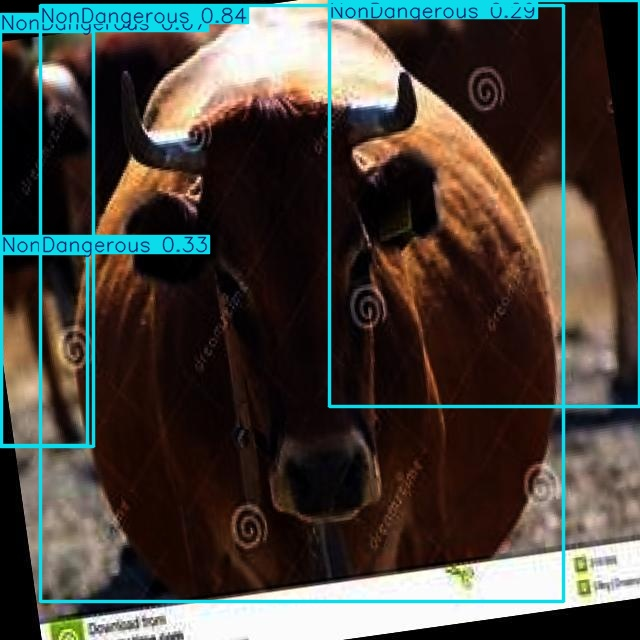

In [14]:
import glob
import os
from IPython.display import Image as IPyImage,display

latest=max(glob.iglob('/kaggle/working/runs/detect/predict*/'),key=os.path.getctime)
for img in glob.glob(f'{latest}/*jpg')[1:10]:
  display(IPyImage(filename=img,width=600))
  print('\n')

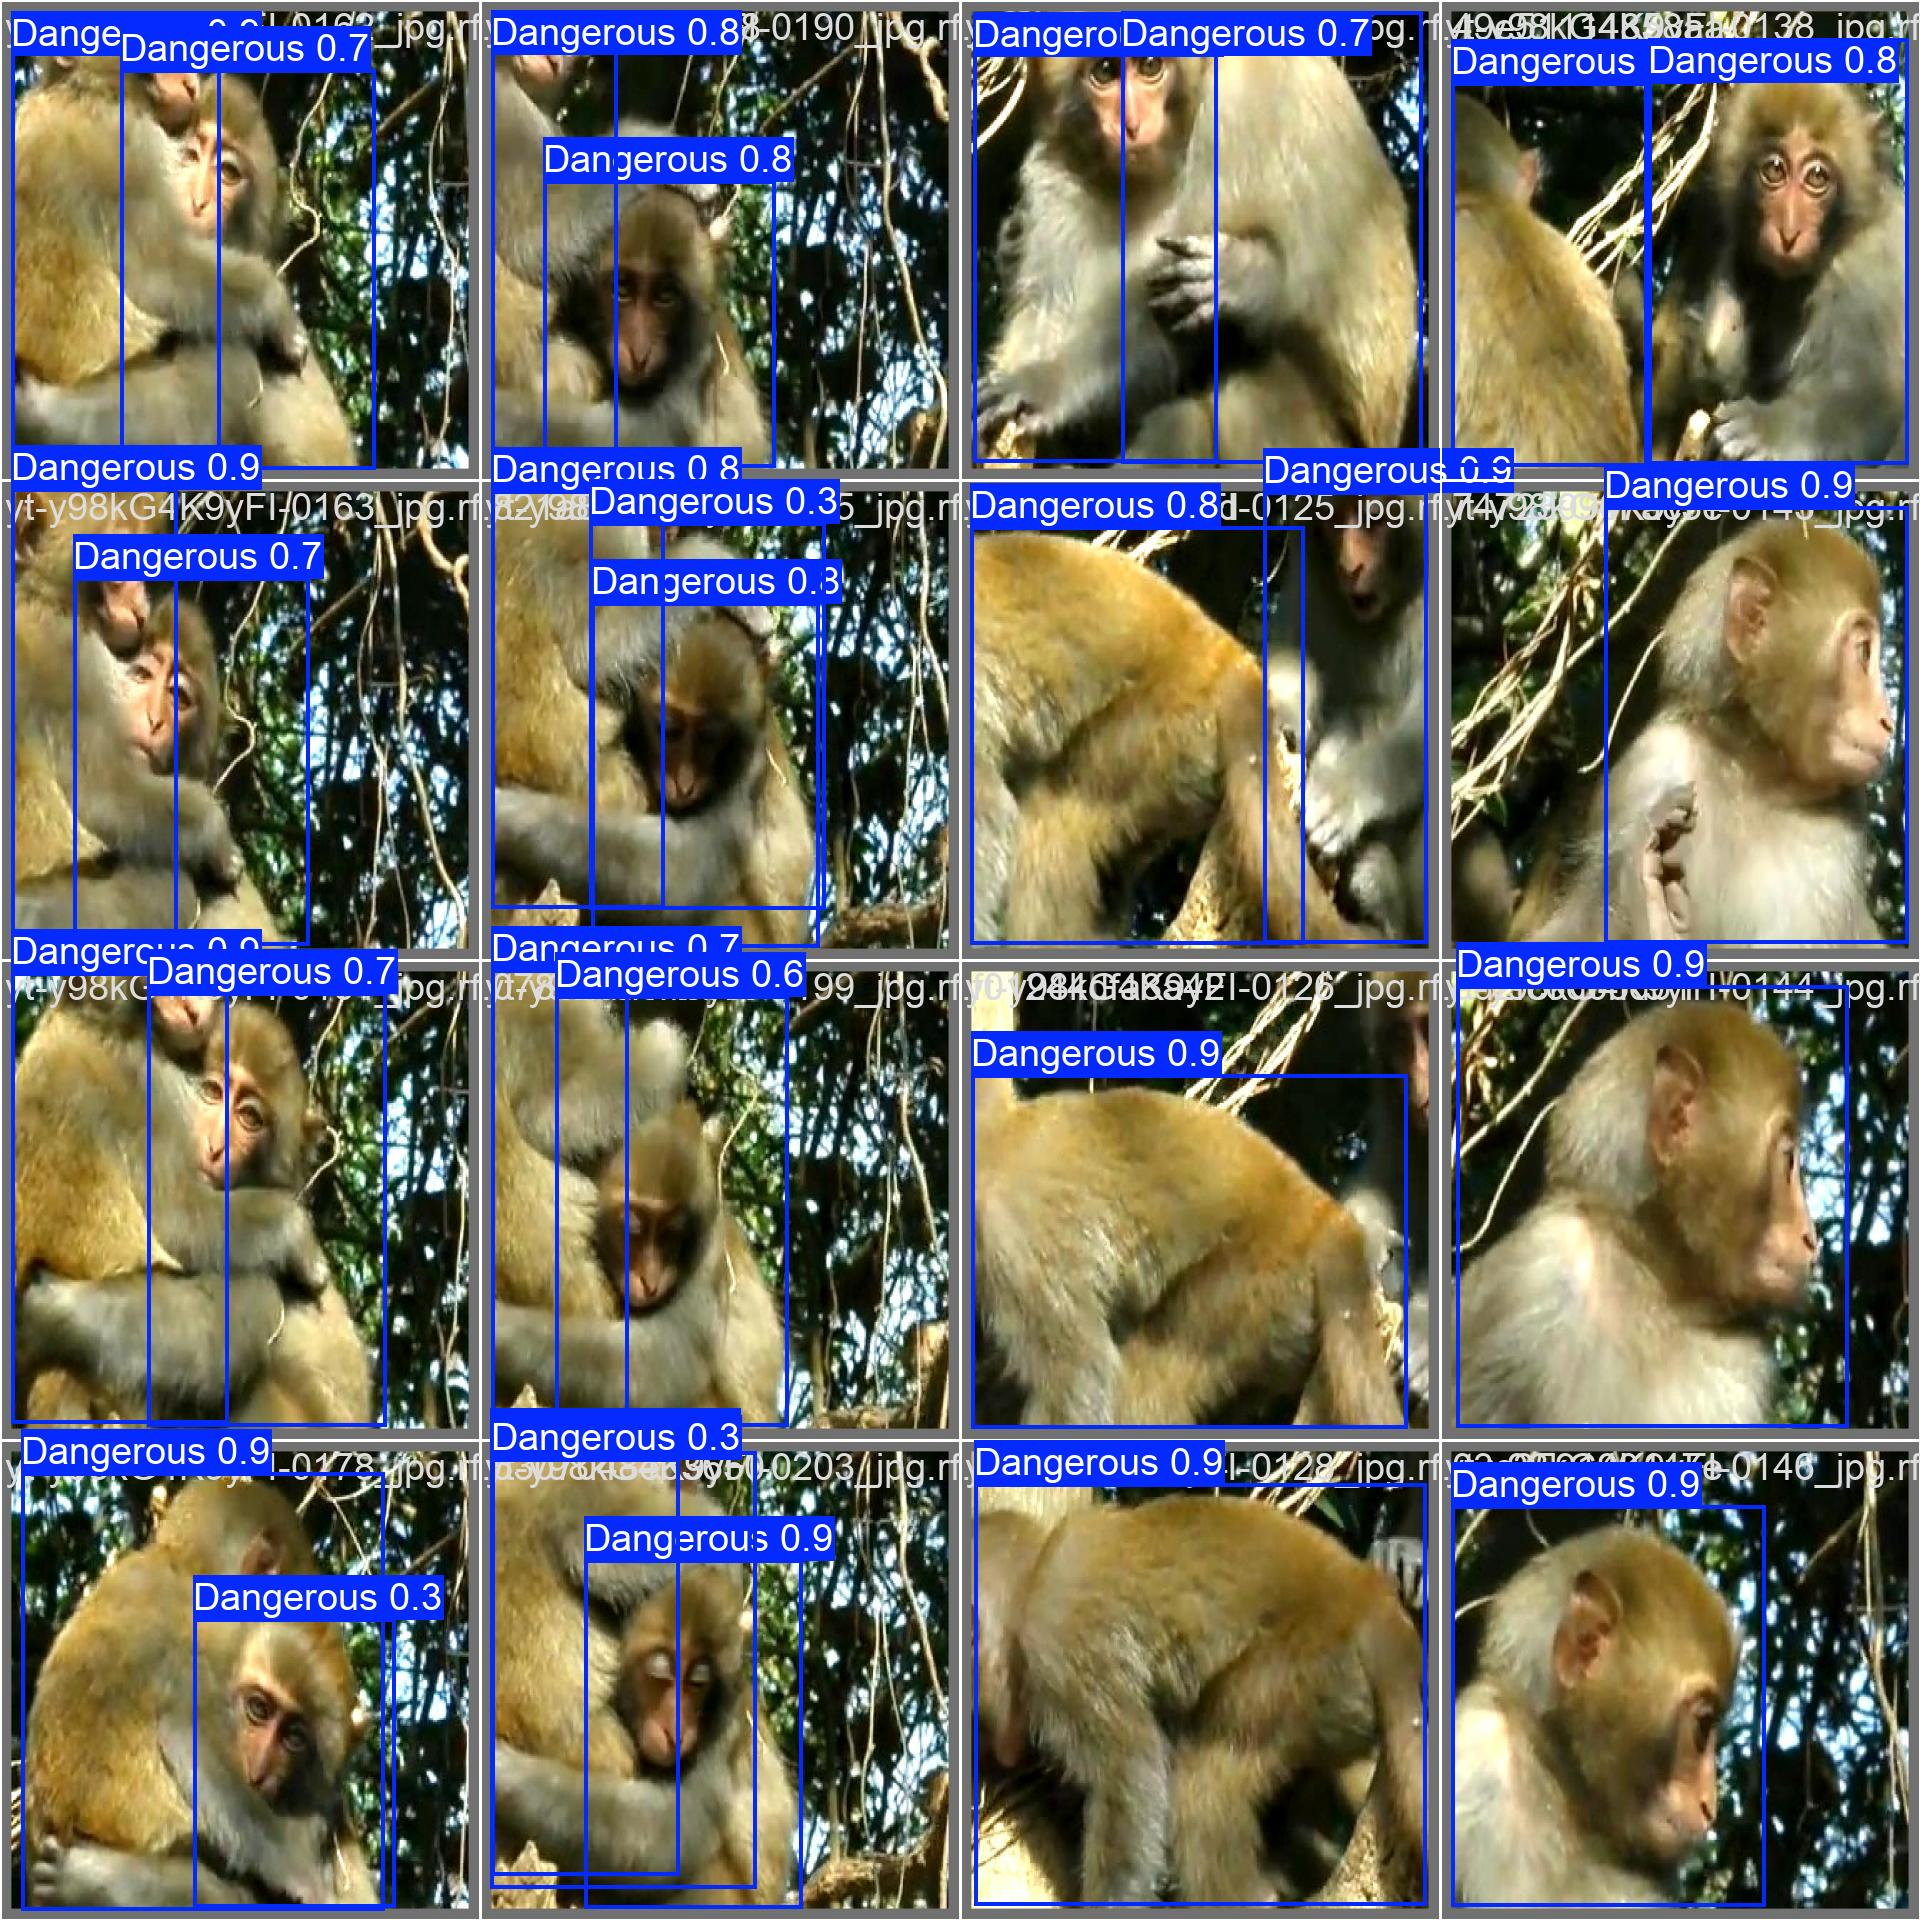

In [15]:
Image('/kaggle/working/runs/detect/train/val_batch0_pred.jpg',width=800)